In [386]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns

rmses=[]

In [387]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [388]:
data_test = pd.read_csv('test.csv').set_index('Id')
data_train = pd.read_csv('train.csv').set_index('Id')
data = pd.concat([data_train, data_test])

print(f'The number of NaN in data_train.SalePrice is {data_train.SalePrice.isna().sum()}')

data.head()

The number of NaN in data_train.SalePrice is 0


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


#### Validating the data sources and Check training and test set are similar

In [389]:
[x for x in zip(data_train.columns,data_train.dtypes, data.dtypes) if x[1]!=x[2]]

[('BsmtFinSF1', dtype('int64'), dtype('float64')),
 ('BsmtFinSF2', dtype('int64'), dtype('float64')),
 ('BsmtUnfSF', dtype('int64'), dtype('float64')),
 ('TotalBsmtSF', dtype('int64'), dtype('float64')),
 ('BsmtFullBath', dtype('int64'), dtype('float64')),
 ('BsmtHalfBath', dtype('int64'), dtype('float64')),
 ('GarageCars', dtype('int64'), dtype('float64')),
 ('GarageArea', dtype('int64'), dtype('float64')),
 ('SalePrice', dtype('int64'), dtype('float64'))]

#### Descriptions of each column in 'data_description.txt'.

In [390]:
#examine data_description
file = open('data_description.txt', 'r')
text = file.read()
print(text)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

### Feature engineering

- handle missing data
- convert important categorical features
- reduce the number of features (we only have about 1400 data points, cannot have too many features)

In [391]:
n_na=[]
for col in data.columns[:-1]:
    n_na.append((sum(data_train[col].isna()), sum(data_test[col].isna()), data[col].dtype))

n_Na = list(zip(data.columns, n_na))

In [392]:
display(n_Na)

[('MSSubClass', (0, 0, dtype('int64'))),
 ('MSZoning', (0, 4, dtype('O'))),
 ('LotFrontage', (259, 227, dtype('float64'))),
 ('LotArea', (0, 0, dtype('int64'))),
 ('Street', (0, 0, dtype('O'))),
 ('Alley', (1369, 1352, dtype('O'))),
 ('LotShape', (0, 0, dtype('O'))),
 ('LandContour', (0, 0, dtype('O'))),
 ('Utilities', (0, 2, dtype('O'))),
 ('LotConfig', (0, 0, dtype('O'))),
 ('LandSlope', (0, 0, dtype('O'))),
 ('Neighborhood', (0, 0, dtype('O'))),
 ('Condition1', (0, 0, dtype('O'))),
 ('Condition2', (0, 0, dtype('O'))),
 ('BldgType', (0, 0, dtype('O'))),
 ('HouseStyle', (0, 0, dtype('O'))),
 ('OverallQual', (0, 0, dtype('int64'))),
 ('OverallCond', (0, 0, dtype('int64'))),
 ('YearBuilt', (0, 0, dtype('int64'))),
 ('YearRemodAdd', (0, 0, dtype('int64'))),
 ('RoofStyle', (0, 0, dtype('O'))),
 ('RoofMatl', (0, 0, dtype('O'))),
 ('Exterior1st', (0, 1, dtype('O'))),
 ('Exterior2nd', (0, 1, dtype('O'))),
 ('MasVnrType', (8, 16, dtype('O'))),
 ('MasVnrArea', (8, 15, dtype('float64'))),
 ('Ex

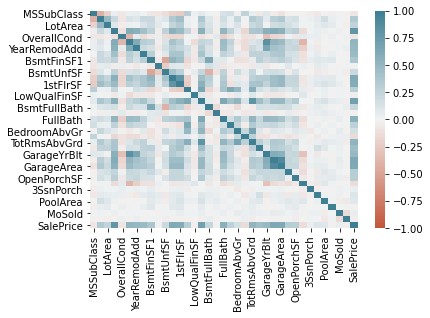

In [393]:
corr = data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

In [394]:
data[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF','GrLivArea']]

data[~(data['1stFlrSF']+data['2ndFlrSF'] == data.GrLivArea)][['TotalBsmtSF', '1stFlrSF', '2ndFlrSF','GrLivArea','HouseStyle']]

,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,HouseStyle
Id,,,,,
52,816.0,816,0,1176,1.5Fin
89,1013.0,1013,0,1526,1.5Fin
126,520.0,520,0,754,1.5Fin
171,720.0,854,0,1382,1.5Fin
186,1107.0,1518,1518,3608,2.5Fin
188,660.0,808,704,1656,1.5Fin
198,1360.0,1360,1360,3112,2Story
199,755.0,929,929,2229,2.5Fin
264,926.0,926,0,1316,1.5Fin


In [395]:
data.MSZoning.value_counts(dropna=False)

RL         2265
RM          460
FV          139
RH           26
C (all)      25
NaN           4
Name: MSZoning, dtype: int64

In [396]:
# fill in missing MSZoning with the mode within the house's neighborhood
for name, group in data[data.MSZoning.isna()].groupby('Neighborhood'):
    zone = data[data.Neighborhood==name]['MSZoning'].mode()[0]
    data.loc[group.index, 'MSZoning'] = data.loc[group.index, 'MSZoning'].fillna(zone)
    

In [397]:
data.MSZoning.value_counts(dropna=False)

RL         2266
RM          463
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [398]:
data = pd.get_dummies(data, prefix='MSZoning', columns=['MSZoning'])

In [399]:
# fill in missing 'LotFrontage' with the mode within house's neighborhood
def fillna_with_grouped_mode(col, groupby, data=data):
    """
    input: 
    col : column name to fill in NaN
    
    groupby: column name to groupby. 
    Modes are calculated within each group 
    and fill to the NaN value of that group.
    
    data = the dataframe contains col and groupby (default: data)
    """
    print(data[col].value_counts(dropna=False))

    for name, group in data[data[col].isna()].groupby(groupby):
        zone = data[data[groupby]==name][col].mode()[0]
        data.loc[group.index, col] = data.loc[group.index, col].fillna(zone)
    
    print('Filled NaN with nbhd mode:')
    print(data[col].value_counts(dropna=False))

In [400]:
fillna_with_grouped_mode('LotFrontage','Neighborhood', data)

NaN      486
60.0     276
80.0     137
70.0     133
50.0     117
        ... 
155.0      1
141.0      1
136.0      1
28.0       1
137.0      1
Name: LotFrontage, Length: 129, dtype: int64
Filled NaN with nbhd mode:
60.0     312
80.0     283
70.0     186
65.0     140
50.0     130
        ... 
144.0      1
119.0      1
182.0      1
195.0      1
141.0      1
Name: LotFrontage, Length: 128, dtype: int64


In [401]:
data.Street.value_counts()

Pave    2907
Grvl      12
Name: Street, dtype: int64

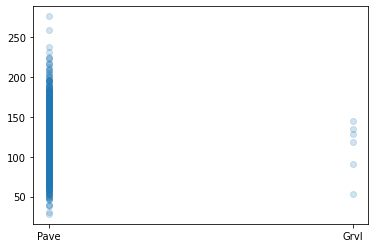

In [402]:
plt.scatter(data.Street, data.SalePrice/data.GrLivArea, alpha=0.2)

For feature 'Street', the 'Grvl' category is small, all the Price or UnitPrice in this category are of typical values. Such a feature is unlikely to be important, delete it. Similarly for 'Alley'.

In [403]:
data = pd.get_dummies(data, prefix='Street', columns=['Street'])

In [404]:
data.Alley.value_counts(dropna=False)

NaN     2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

In [405]:
data = pd.get_dummies(data, prefix='Alley', columns=['Alley'])

In [406]:
data= pd.get_dummies(data, prefix='LotShape', columns=['LotShape'])

In [407]:
data.LandContour.value_counts()

Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64

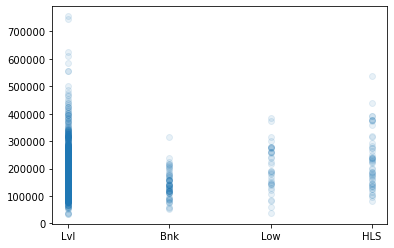

In [408]:
plt.scatter(data.LandContour, data.SalePrice,alpha=0.1)

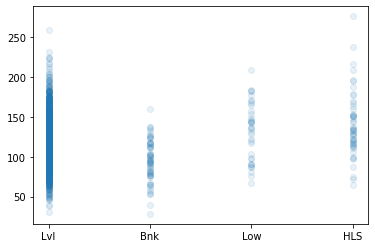

In [409]:
len_test=len(data_test)



plt.scatter(data.iloc[:len_test].LandContour, data.iloc[:len_test].SalePrice/data.iloc[:len_test].GrLivArea,alpha=0.1)

In [410]:
data = pd.get_dummies(data, prefix='LandContour',columns=['LandContour'])

In [411]:
data.Utilities.value_counts(dropna=False)

AllPub    2916
NaN          2
NoSeWa       1
Name: Utilities, dtype: int64

In [412]:
data= data.drop('Utilities', axis=1)

In [413]:
data.LotConfig.value_counts()

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

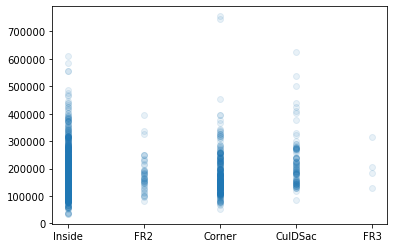

In [414]:
plt.scatter(data.LotConfig, data.SalePrice,alpha=0.1)

In [415]:
# LotConfig: combine FR2 and FR3, get_dummies

data.loc[data.LotConfig == 'FR3', 'LotConfig'] = data[data.LotConfig == 'FR3'].LotConfig.apply(lambda x: 'FR2') 

In [416]:
data.LotConfig.value_counts()

Inside     2133
Corner      511
CulDSac     176
FR2          99
Name: LotConfig, dtype: int64

In [417]:
data = pd.get_dummies(data, prefix='LotConfig', columns=['LotConfig'],dummy_na=True)

In [418]:
data.LandSlope.value_counts()

Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64

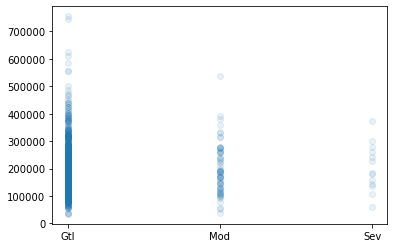

In [419]:
plt.scatter(data.LandSlope, data.SalePrice,alpha=0.1)

In [420]:
data.loc[data.LandSlope == 'Sev', 'LandSlope'] = data[data.LandSlope == 'Sev'].LandSlope.apply(lambda x: 'Mod')

In [421]:
data= pd.get_dummies(data, prefix='LandSlope', columns=['LandSlope'],dummy_na=True)

In [422]:
temp_nbhd = data.Neighborhood.copy()

In [423]:
# 'Neighborhood' is important, so get_dummies

data= pd.get_dummies(data, prefix='Neighborhood', columns=['Neighborhood'],dummy_na=True)

In [424]:
data

,MSSubClass,LotFrontage,LotArea,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,Norm,Norm,1Fam,2Story,7,5,2003,...,0,0,0,0,0,0,0,0,0,0
2,20,80.0,9600,Feedr,Norm,1Fam,1Story,6,8,1976,...,0,0,0,0,0,0,0,0,1,0
3,60,68.0,11250,Norm,Norm,1Fam,2Story,7,5,2001,...,0,0,0,0,0,0,0,0,0,0
4,70,60.0,9550,Norm,Norm,1Fam,2Story,7,5,1915,...,0,0,0,0,0,0,0,0,0,0
5,60,84.0,14260,Norm,Norm,1Fam,2Story,8,5,2000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,21.0,1936,Norm,Norm,Twnhs,2Story,4,7,1970,...,0,0,0,0,0,0,0,0,0,0
2916,160,21.0,1894,Norm,Norm,TwnhsE,2Story,4,5,1970,...,0,0,0,0,0,0,0,0,0,0
2917,20,160.0,20000,Norm,Norm,1Fam,1Story,5,7,1960,...,0,0,0,0,0,0,0,0,0,0


In [425]:
data['Neighborhood']= temp_nbhd

In [426]:
display(data.Condition1.value_counts())

data.Condition2.value_counts()

Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64

Norm      2889
Feedr       13
Artery       5
PosA         4
PosN         4
RRNn         2
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [427]:
# replace Condition1 and Condition2 with 2 new features: StreetAdj and RailroadAdj

data['StreetAdj'] = ((data.Condition1 == 'Artery') |(data.Condition1 == 'Feedr')| (data.Condition2 == 'Feedr')|(data.Condition2 == 'Artery'))*1

In [428]:
sum((data.Condition1.isin(['RRNn','RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe']))|(data.Condition2.isin(['RRNn','RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'])))

157

In [429]:
data['RailroadAdj'] = ((data.Condition1.isin(['RRNn','RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe']))|(data.Condition2.isin(['RRNn','RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'])))*1

In [430]:
data.StreetAdj

Id
1       0
2       1
3       0
4       0
5       0
       ..
2915    0
2916    0
2917    0
2918    0
2919    0
Name: StreetAdj, Length: 2919, dtype: int64

In [431]:
data = data.drop(['Condition1', 'Condition2'], axis=1)

In [432]:
data.BldgType.value_counts()

1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

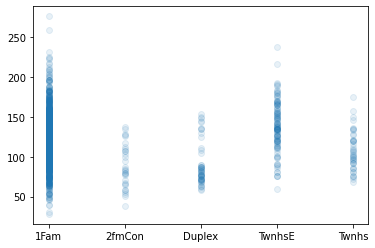

In [433]:
plt.scatter(data.BldgType, data.SalePrice/data.GrLivArea,alpha=0.1)

In [434]:
temp_BldgType = data[~data.SalePrice.isna()].groupby(['BldgType','Neighborhood'])[['SalePrice', 'GrLivArea']].mean()

In [435]:
temp_BldgType['UnitPrice'] = temp_BldgType.SalePrice/temp_BldgType.GrLivArea

temp_BldgType.sort_values(['BldgType','UnitPrice'], ascending=False)[:60]

SalePrice    GrLivArea   UnitPrice
BldgType Neighborhood                                        
TwnhsE   Veenker       279833.333333  1500.333333  186.514108
         Crawfor       300833.333333  1641.000000  183.323177
         CollgCr       143470.000000   848.000000  169.186321
         NridgHt       244514.666667  1490.866667  164.008407
         NAmes         157000.000000  1052.000000  149.239544
         StoneBr       220833.333333  1519.166667  145.364783
         Blmngtn       197056.875000  1438.062500  137.029423
         Somerst       180410.277778  1326.388889  136.016126
         Mitchel       160166.666667  1255.000000  127.622842
         SawyerW       144800.000000  1171.571429  123.594684
         NPkVill       140208.333333  1154.000000  121.497689
         Edwards       140750.000000  1231.000000  114.337937
         Blueste       124000.000000  1229.000000  100.895037
         MeadowV       106930.000000  1205.800000   88.679715
         BrDale        110750.000000  1254.750000   88.264595
Twnhs    Mitchel       164000.000000  1216.000000  134.868421
         NridgHt       192214.285714  1480.857143  129.799344
         Somerst       167533.333333  1450.222222  115.522525
         MeadowV        86642.857143   849.142857  102.035666
         NPkVill       147666.666667  1451.000000  101.768895
         Blueste       151000.000000  1556.000000   97.043702
         BrDale        102408.333333  1106.000000   92.593430
         Edwards       132500.000000  1709.000000   77.530720
Duplex   IDOTRR        110000.000000   816.000000  134.803922
         OldTown       136166.666667  1317.333333  103.365385
         Mitchel       157400.000000  1619.125000   97.213001
         Edwards       127612.500000  1361.500000   93.729343
         NWAmes        135952.500000  1668.000000   81.506295
         NAmes         126062.352941  1556.764706   80.977140
         SawyerW       135622.400000  1710.800000   79.274258
         Crawfor       145000.000000  1980.000000   73.232323
         Sawyer        127076.500000  1762.000000   72.120602
2fmCon   Gilbert       145000.000000  1056.000000  137.310606
         Timber        228950.000000  1786.000000  128.191489
         NAmes         140000.000000  1095.000000  127.853881
         Sawyer        131500.000000  1039.000000  126.564004
         BrkSide       123500.000000  1018.500000  121.256750
         Crawfor       157000.000000  1336.000000  117.514970
         Mitchel       168000.000000  1622.000000  103.575832
         Edwards       110000.000000  1197.500000   91.858038
         IDOTRR         69750.000000   923.000000   75.568797
         SWISU         165300.000000  2346.333333   70.450348
         OldTown       120610.714286  1768.500000   68.199443
1Fam     StoneBr       393267.307692  2211.307692  177.843775
         NridgHt       351629.418182  2087.254545  168.465039
         Somerst       247923.406780  1701.440678  145.713812
         Veenker       223375.000000  1554.375000  143.707278
         Timber        242606.837838  1748.378378  138.761060
         NoRidge       335295.317073  2508.853659  133.644829
         CollgCr       201858.328571  1525.678571  132.307245
         Mitchel       155153.777778  1218.333333  127.349202
         Blmngtn       159895.000000  1266.000000  126.299368
         SawyerW       198193.191489  1645.765957  120.426110
         ClearCr       212565.428571  1788.107143  118.877344
         Sawyer        137742.283582  1168.791045  117.850222
         Gilbert       193468.025641  1648.820513  117.337226
         Crawfor       208719.133333  1803.400000  115.736461
         NAmes         147407.478049  1293.443902  113.965111
         NWAmes        190545.774648  1729.464789  110.176152
         BrkSide       124881.696429  1209.660714  103.236961

In [436]:
temp_BldgType.sort_values(['Neighborhood','SalePrice','UnitPrice'], ascending=False)[:60]

SalePrice    GrLivArea   UnitPrice
BldgType Neighborhood                                        
TwnhsE   Veenker       279833.333333  1500.333333  186.514108
1Fam     Veenker       223375.000000  1554.375000  143.707278
         Timber        242606.837838  1748.378378  138.761060
2fmCon   Timber        228950.000000  1786.000000  128.191489
1Fam     StoneBr       393267.307692  2211.307692  177.843775
TwnhsE   StoneBr       220833.333333  1519.166667  145.364783
1Fam     Somerst       247923.406780  1701.440678  145.713812
TwnhsE   Somerst       180410.277778  1326.388889  136.016126
Twnhs    Somerst       167533.333333  1450.222222  115.522525
1Fam     SawyerW       198193.191489  1645.765957  120.426110
TwnhsE   SawyerW       144800.000000  1171.571429  123.594684
Duplex   SawyerW       135622.400000  1710.800000   79.274258
1Fam     Sawyer        137742.283582  1168.791045  117.850222
2fmCon   Sawyer        131500.000000  1039.000000  126.564004
Duplex   Sawyer        127076.500000  1762.000000   72.120602
2fmCon   SWISU         165300.000000  2346.333333   70.450348
1Fam     SWISU         139494.727273  1726.909091   80.777111
Duplex   OldTown       136166.666667  1317.333333  103.365385
1Fam     OldTown       129087.593750  1442.687500   89.477169
2fmCon   OldTown       120610.714286  1768.500000   68.199443
1Fam     NridgHt       351629.418182  2087.254545  168.465039
TwnhsE   NridgHt       244514.666667  1490.866667  164.008407
Twnhs    NridgHt       192214.285714  1480.857143  129.799344
1Fam     NoRidge       335295.317073  2508.853659  133.644829
         NWAmes        190545.774648  1729.464789  110.176152
Duplex   NWAmes        135952.500000  1668.000000   81.506295
Twnhs    NPkVill       147666.666667  1451.000000  101.768895
TwnhsE   NPkVill       140208.333333  1154.000000  121.497689
         NAmes         157000.000000  1052.000000  149.239544
1Fam     NAmes         147407.478049  1293.443902  113.965111
2fmCon   NAmes         140000.000000  1095.000000  127.853881
Duplex   NAmes         126062.352941  1556.764706   80.977140
2fmCon   Mitchel       168000.000000  1622.000000  103.575832
Twnhs    Mitchel       164000.000000  1216.000000  134.868421
TwnhsE   Mitchel       160166.666667  1255.000000  127.622842
Duplex   Mitchel       157400.000000  1619.125000   97.213001
1Fam     Mitchel       155153.777778  1218.333333  127.349202
TwnhsE   MeadowV       106930.000000  1205.800000   88.679715
Twnhs    MeadowV        86642.857143   849.142857  102.035666
Duplex   IDOTRR        110000.000000   816.000000  134.803922
1Fam     IDOTRR        101620.000000  1164.794118   87.242886
2fmCon   IDOTRR         69750.000000   923.000000   75.568797
1Fam     Gilbert       193468.025641  1648.820513  117.337226
2fmCon   Gilbert       145000.000000  1056.000000  137.310606
TwnhsE   Edwards       140750.000000  1231.000000  114.337937
Twnhs    Edwards       132500.000000  1709.000000   77.530720
1Fam     Edwards       128402.098765  1336.679012   96.060533
Duplex   Edwards       127612.500000  1361.500000   93.729343
2fmCon   Edwards       110000.000000  1197.500000   91.858038
TwnhsE   Crawfor       300833.333333  1641.000000  183.323177
1Fam     Crawfor       208719.133333  1803.400000  115.736461
2fmCon   Crawfor       157000.000000  1336.000000  117.514970
Duplex   Crawfor       145000.000000  1980.000000   73.232323
1Fam     CollgCr       201858.328571  1525.678571  132.307245
TwnhsE   CollgCr       143470.000000   848.000000  169.186321
1Fam     ClearCr       212565.428571  1788.107143  118.877344
         BrkSide       124881.696429  1209.660714  103.236961
2fmCon   BrkSide       123500.000000  1018.500000  121.256750
TwnhsE   BrDale        110750.000000  1254.750000   88.264595
Twnhs    BrDale        102408.333333  1106.000000   92.593430

In [437]:
temp_BldgType = data[~data.SalePrice.isna()].groupby(['HouseStyle','Neighborhood'])[['SalePrice', 'GrLivArea']].mean()
temp_BldgType['UnitPrice'] = temp_BldgType.SalePrice/temp_BldgType.GrLivArea

temp_BldgType.sort_values(['UnitPrice'], ascending=False)[:60]

SalePrice    GrLivArea   UnitPrice
HouseStyle Neighborhood                                        
1Story     NridgHt       304793.588235  1715.411765  177.679549
           StoneBr       283094.166667  1608.222222  176.029259
           Veenker       243937.500000  1435.250000  169.961679
SFoyer     CollgCr       138300.000000   816.666667  169.346939
SLvl       SawyerW       275000.000000  1644.000000  167.274939
1Story     Somerst       245330.162162  1522.702703  161.114945
           NoRidge       345066.666667  2217.500000  155.610673
SFoyer     Mitchel       158460.000000  1027.600000  154.203970
1Story     Timber        253671.304348  1677.608696  151.210056
           Gilbert       201782.636364  1335.090909  151.137750
SFoyer     NAmes         140393.333333   943.666667  148.774285
1.5Fin     SawyerW       316600.000000  2132.000000  148.499062
2Story     StoneBr       380968.571429  2575.571429  147.916135
SLvl       Mitchel       160640.000000  1086.800000  147.810085
2Story     NridgHt       338783.269231  2309.307692  146.703391
1Story     ClearCr       223681.818182  1529.545455  146.240713
SFoyer     NWAmes        170000.000000  1173.000000  144.927536
SLvl       CollgCr       143133.333333   988.333333  144.822934
1Story     CollgCr       186709.582418  1289.560440  144.785445
SFoyer     SawyerW       148112.333333  1034.666667  143.149807
           OldTown       142000.000000   996.000000  142.570281
1.5Unf     NAmes         120250.000000   862.500000  139.420290
1Story     Crawfor       218143.368421  1586.368421  137.511164
SLvl       ClearCr       155000.000000  1130.666667  137.087264
1Story     Blmngtn       194870.882353  1427.941176  136.469825
2Story     Veenker       294000.000000  2167.000000  135.671435
1Story     NPkVill       134812.500000  1013.500000  133.016774
SFoyer     MeadowV        83166.666667   630.000000  132.010582
2Story     NoRidge       332779.030303  2528.727273  131.599415
           Somerst       210315.306122  1652.489796  127.271773
1.5Unf     BrkSide       118750.000000   936.500000  126.801922
SLvl       Timber        166875.000000  1348.250000  123.771556
           Gilbert       173785.714286  1410.428571  123.214828
           Edwards       162828.333333  1324.000000  122.982125
1Story     SWISU          75500.000000   614.000000  122.964169
SFoyer     Sawyer        138143.166667  1124.166667  122.884952
1Story     SawyerW       161472.214286  1316.785714  122.626037
1.5Unf     Crawfor        96500.000000   789.000000  122.306717
1Story     Mitchel       152095.312500  1253.000000  121.384926
SFoyer     Edwards       144400.000000  1194.200000  120.917769
2Story     Timber        254112.555556  2110.555556  120.400790
1Story     MeadowV       131950.000000  1101.000000  119.845595
2Story     CollgCr       223773.471698  1873.773585  119.423965
1.5Fin     Timber        208225.000000  1751.500000  118.883814
           Crawfor       220372.222222  1854.333333  118.841752
1.5Unf     IDOTRR        113200.000000   955.500000  118.472004
SLvl       Sawyer        155100.000000  1311.400000  118.270551
1Story     NWAmes        179705.857143  1529.714286  117.476746
SLvl       NAmes         167535.714286  1426.857143  117.415899
1Story     NAmes         141184.169811  1205.245283  117.141441
           Sawyer        132932.698113  1143.113208  116.290055
SLvl       Veenker       190500.000000  1643.500000  115.911165
1.5Fin     NoRidge       347500.000000  3055.000000  113.747954
2Story     Gilbert       193923.283333  1722.550000  112.579190
1Story     OldTown       107876.545455   975.636364  110.570444
1.5Unf     OldTown        95100.000000   861.000000  110.452962
1Story     Edwards       122114.150943  1122.377358  108.799549
2Story     SawyerW       214945.320000  1982.880000  108.400569
           ClearCr       223487.500000  2074.875000  107.711308
1Story     BrkSide        89985.000000   853.600000  105.418229

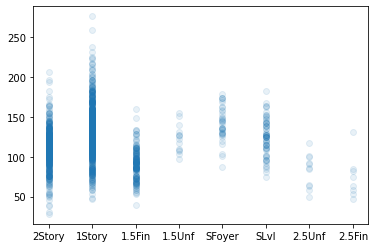

In [438]:
plt.scatter(data.HouseStyle, data.SalePrice/data.GrLivArea, alpha=0.1)

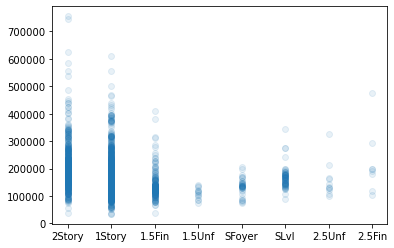

In [439]:
plt.scatter(data.HouseStyle, data.SalePrice, alpha=0.1)

No obvious ways to reorganize BldgType or Neighborhood, should leave it to machine.


In [440]:
to_level = {'2Story':2, '1Story':1, '1.5Fin':2,  '1.5Unf':2, 'SFoyer':2, 'SLvl':3, '2.5Unf':3, '2.5Fin':3}

def style_to_level(x):
    return to_level[x]

In [441]:
data['HouseStyle'] = data.HouseStyle.apply(style_to_level)

In [442]:
data['Level'] = data.HouseStyle
data = data.drop('HouseStyle',axis=1)

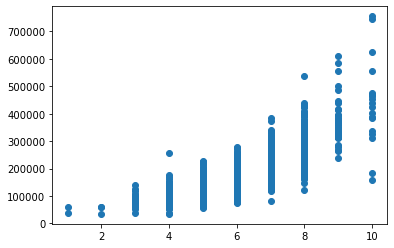

In [443]:
plt.scatter(data.OverallQual, data.SalePrice)

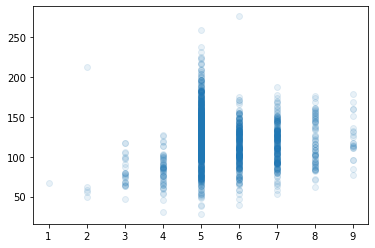

In [444]:
plt.scatter(data.OverallCond, data.SalePrice/data.GrLivArea, alpha=0.1)

In [445]:
'''def plot_scatter_price(col):
    print(data[col].value_counts(dropna=False))
    fig,ax = plt.subplots(1,2, figsize=(11,5))

    ax[0].scatter(data[col].fillna('NaN'), data.SalePrice, alpha=.1)
    ax[1].scatter(data[col].fillna('NaN'), data.SalePrice/data.GrLivArea, alpha=0.1)
    plt.title(col)
    plt.show()'''

def plot_scatter_price(col):
    pass

In [446]:
plot_scatter_price('YearBuilt')

In [447]:
data.YearRemodAdd.value_counts(dropna=False)

1950    361
2006    202
2007    164
2005    141
2004    111
       ... 
2010     13
1981     12
1986     12
1983     11
1982      9
Name: YearRemodAdd, Length: 61, dtype: int64

In [448]:
plot_scatter_price('YearRemodAdd')

In [449]:
plot_scatter_price('RoofStyle')

In [450]:
plot_scatter_price('RoofMatl')

In [451]:
plot_scatter_price('Exterior1st')

In [452]:
data.Exterior1st.mode()[0]

'VinylSd'

In [453]:
data['Exterior1st'] = data['Exterior1st'].fillna(data.Exterior1st.mode()[0])

In [454]:
data.Exterior1st.value_counts(dropna=False)

VinylSd    1026
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
Stone         2
AsphShn       2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [455]:
data.drop('Exterior2nd', axis=1, inplace=True)


In [456]:
data.Exterior1st.unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [457]:
materials = ['Wood', 'Metal', 'Wood', 'Wood', 'Brick', 'Wood', 'Cement', 'Wood', 'Shng', 'Stucco', 'Brick', 'Shng', 'Other', 'Stucco', 'Cement']

to_mtrl = dict(zip(data.Exterior1st.unique(), materials) )

In [458]:
data['Exterior1st'] = data.Exterior1st.apply(lambda x: to_mtrl[x])

In [459]:
data = pd.get_dummies(data, prefix='Exterior', columns=['Exterior1st'],dummy_na=True)

In [460]:
plot_scatter_price('MasVnrType')

In [461]:
data[~data.SalePrice.isna()].SalePrice

Id
1       208500.0
2       181500.0
3       223500.0
4       140000.0
5       250000.0
          ...   
1456    175000.0
1457    210000.0
1458    266500.0
1459    142125.0
1460    147500.0
Name: SalePrice, Length: 1460, dtype: float64

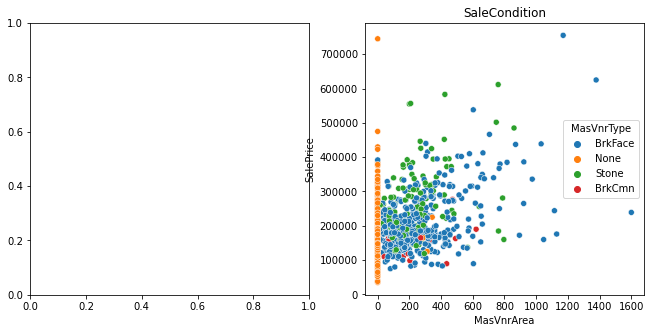

In [462]:
fig,ax = plt.subplots(1,2, figsize=(11,5))

ax[0] = sns.scatterplot(x= 'MasVnrArea', y='SalePrice', hue='MasVnrType', data=data[~data.SalePrice.isna()])

plt.title(col)
plt.show()

In [463]:
data['MasVnrType'].fillna(value={'NaN':None}, inplace=True)

data.MasVnrType.value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [464]:
data.MasVnrArea.fillna(value=0.0, inplace=True)

In [465]:
plot_scatter_price('MasVnrArea')

In [466]:
data=pd.get_dummies(data, prefix='MasVnrType', columns=['MasVnrType'], dummy_na=True)

In [467]:
ExterQual_to_rank={'Ex':1, 'Gd':2,'TA':3,'Fa':4, 'Po':5}

def Qual_to_rank(x):
    if x:
        if x in ExterQual_to_rank.keys():
            return ExterQual_to_rank[x]
        else:
            return 0
    else:
        return 0

In [468]:
data['ExterQual'] = data.ExterQual.apply(Qual_to_rank)

In [469]:
data['ExterCond']=data.ExterCond.apply(Qual_to_rank)

In [470]:
data.shape

(2919, 133)

In [471]:
plot_scatter_price('Foundation')

In [472]:
data=pd.get_dummies(data, prefix='Foundation', columns=['Foundation'])

In [473]:
data['BsmtQual'] = data['BsmtQual'].apply(Qual_to_rank)

In [474]:
data.BsmtQual.value_counts(dropna=False)

3    1283
2    1209
1     258
4      88
0      81
Name: BsmtQual, dtype: int64

In [475]:
data['BsmtCond'] = data['BsmtCond'].apply(Qual_to_rank)

In [476]:
data.BsmtCond.value_counts(dropna=False)

3    2606
2     122
4     104
0      82
5       5
Name: BsmtCond, dtype: int64

In [477]:
data.ExterQual

Id
1       2
2       3
3       2
4       3
5       2
       ..
2915    3
2916    3
2917    3
2918    3
2919    3
Name: ExterQual, Length: 2919, dtype: int64

In [478]:
plot_scatter_price('BsmtExposure')

In [479]:
plot_scatter_price('BsmtFinType1')

In [480]:
plot_scatter_price('BsmtFinType2')

In [481]:
plot_scatter_price('BsmtFinSF1')

In [482]:
plot_scatter_price('BsmtFinSF2')

Keep 'BsmtFinSF1' and 'BsmtFinType1', delete 'BsmtFinSF2' and 'BsmtFinType2'

In [483]:
data = data.drop(['BsmtFinSF2','BsmtFinType2'], axis=1)

In [484]:
data.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [485]:
BsmtFinType1_to_rank = dict(zip(data.BsmtFinType1.unique(), [3,2,0,2,1,0,1]))
print(BsmtFinType1_to_rank)
def Type1_to_rank(x):
    if x:
        return BsmtFinType1_to_rank[x]
    else:
        return 0
    

{'GLQ': 3, 'ALQ': 2, 'Unf': 0, 'Rec': 2, 'BLQ': 1, nan: 0, 'LwQ': 1}


In [486]:
data['BsmtFinType1']=data['BsmtFinType1'].apply(Type1_to_rank)

In [487]:
data.BsmtFinType1

Id
1       3
2       2
3       3
4       2
5       3
       ..
2915    0
2916    2
2917    2
2918    3
2919    1
Name: BsmtFinType1, Length: 2919, dtype: int64

In [488]:
data['BsmtFinSF1'].fillna(0, inplace=True)

In [489]:
data.BsmtFinSF1.isna().sum()

0

In [490]:
plot_scatter_price('BsmtUnfSF')

In [491]:
data = data.drop('TotalBsmtSF', axis=1)

In [492]:
plot_scatter_price('Heating')

In [493]:
### delete Heating

del data['Heating']

In [494]:
plot_scatter_price('HeatingQC')

In [495]:
data['HeatingQC'] = data['HeatingQC'].apply(Qual_to_rank)

In [496]:
data.HeatingQC

Id
1       1
2       1
3       1
4       2
5       1
       ..
2915    2
2916    3
2917    1
2918    3
2919    1
Name: HeatingQC, Length: 2919, dtype: int64

In [497]:
plot_scatter_price('CentralAir')

In [498]:
data['CentralAir']=data['CentralAir'].apply(lambda x: x=='Y')

In [499]:
data.CentralAir

Id
1       True
2       True
3       True
4       True
5       True
        ... 
2915    True
2916    True
2917    True
2918    True
2919    True
Name: CentralAir, Length: 2919, dtype: bool

In [500]:
plot_scatter_price('Electrical')

In [501]:
del data['Electrical']

In [502]:
plot_scatter_price('LowQualFinSF')

In [503]:
del data['LowQualFinSF']

In [504]:
data['BsmtBath'] = data.BsmtFullBath + data.BsmtHalfBath*0.5

In [505]:
plot_scatter_price('BsmtBath')

In [506]:
data['BsmtBath'] =data['BsmtBath'].fillna(0)

In [507]:
del data['BsmtFullBath'] 

In [508]:
del data['BsmtHalfBath']

In [509]:
data['Bath'] = data.FullBath + data.HalfBath*0.5

In [510]:
plot_scatter_price('Bath')

In [511]:
data.columns[-100:]

Index(['FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice',
       'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_Pave',
       'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'LotConfig_Corner', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_Inside', 'LotConfig_nan', 'LandSlope_Gtl',
       'LandSlope_Mod', 'LandSlope_nan', 'Neighborhood_Blmngtn',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhoo

In [512]:
plot_scatter_price('BedroomAbvGr')

In [513]:
plot_scatter_price('KitchenAbvGr')

In [514]:
plot_scatter_price('KitchenQual')

In [515]:
data['KitchenQual'] = data['KitchenQual'].apply(Qual_to_rank)

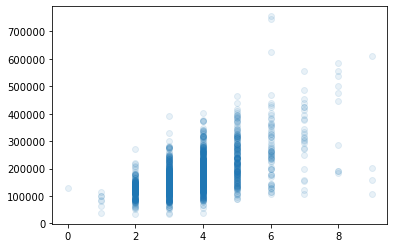

In [516]:
plt.scatter(data.TotRmsAbvGrd- data.BedroomAbvGr, data.SalePrice,alpha=.1)

In [517]:
plot_scatter_price('TotRmsAbvGrd')

In [518]:
plot_scatter_price('Functional')

In [519]:
data.Functional.unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev', nan],
      dtype=object)

In [520]:
Func_to_rank=dict(zip(data.Functional.unique(), [0,1,3,1,2,3,4,0]))
print(Func_to_rank)

def Functional_to_rank(x):
    return Func_to_rank[x]


{'Typ': 0, 'Min1': 1, 'Maj1': 3, 'Min2': 1, 'Mod': 2, 'Maj2': 3, 'Sev': 4, nan: 0}


In [521]:
data['Functional'] = data.Functional.apply(Functional_to_rank)

In [522]:
plot_scatter_price('Fireplaces')

In [523]:
plot_scatter_price('FireplaceQu')

In [524]:
data['FireplaceQu'] = data.FireplaceQu.apply(Qual_to_rank)

In [525]:
data.FireplaceQu.value_counts(dropna=False)

0    1420
2     744
3     592
4      74
5      46
1      43
Name: FireplaceQu, dtype: int64

In [526]:
plot_scatter_price('GarageType')

In [527]:
data = pd.get_dummies(data, prefix='GarageType', columns=['GarageType'],dummy_na=True)

In [528]:
plot_scatter_price('GarageYrBlt')

In [529]:
data.GarageYrBlt.corr(data.YearBuilt)

0.8348123731631015

In [530]:
del data['GarageYrBlt']

In [531]:
plot_scatter_price('GarageFinish')

In [532]:
GarFinRk = {'Fin':3,'RFn':2, 'Unf':1}

In [533]:
def GarFin_to_Rk(x):
    if x in GarFinRk.keys():
        return GarFinRk[x]
    else:
        return 0

In [534]:
data['GarageFinish']= data.GarageFinish.apply(GarFin_to_Rk)

In [535]:
data.GarageFinish

Id
1       2
2       2
3       2
4       1
5       2
       ..
2915    0
2916    1
2917    1
2918    0
2919    3
Name: GarageFinish, Length: 2919, dtype: int64

In [536]:
data.GarageQual = data.GarageQual.apply(Qual_to_rank)

In [537]:
data.GarageQual.corr(data.GarageFinish)

0.3772758709602635

In [538]:
data.GarageQual

Id
1       3
2       3
3       3
4       3
5       3
       ..
2915    0
2916    3
2917    3
2918    0
2919    3
Name: GarageQual, Length: 2919, dtype: int64

In [539]:
plot_scatter_price('GarageCond')

In [540]:
del data['GarageQual']

In [541]:
del data['GarageCond']

In [542]:
data.GarageCars.corr(data.GarageArea)

0.8897004146858453

In [543]:
del data['GarageCars']

In [544]:
plot_scatter_price('PavedDrive')

In [545]:
data['PavedDrive'] = (data.PavedDrive == 'Y')*2+(data.PavedDrive == 'P')*1

In [546]:
data.PavedDrive.value_counts()

2    2641
0     216
1      62
Name: PavedDrive, dtype: int64

In [547]:
plot_scatter_price('WoodDeckSF')

In [548]:
plot_scatter_price('OpenPorchSF')

In [549]:
plot_scatter_price('EnclosedPorch')

In [550]:
plot_scatter_price('3SsnPorch')

In [551]:
plot_scatter_price('ScreenPorch')

In [552]:
plot_scatter_price('PoolArea')

In [553]:
plot_scatter_price('PoolQC')

In [554]:
del data['PoolQC']

In [555]:
plot_scatter_price('Fence')

In [556]:
Fence_rank={'MnPrv':1, 'GdPrv':2, 'GdWo':2, 'MnWw':1}

def fence_to_rank(x):
    if x in Fence_rank.keys():
        return Fence_rank[x]
    else:
        return 0

In [557]:
data['Fence']=data.Fence.apply(fence_to_rank)

In [558]:
data.Fence

Id
1       0
2       0
3       0
4       0
5       0
       ..
2915    0
2916    0
2917    0
2918    1
2919    0
Name: Fence, Length: 2919, dtype: int64

In [559]:
plot_scatter_price('MiscFeature')

In [560]:
del data['MiscFeature']

In [561]:
plot_scatter_price('MiscVal')

In [562]:
plot_scatter_price('SaleCondition')

In [563]:
data = pd.get_dummies(data, prefix='SaleCondition', columns=['SaleCondition'])

In [564]:
plot_scatter_price('SaleType')

In [565]:
data.loc[~((data.SaleType=='WD')|(data.SaleType=='New')|(data.SaleType=='COD')), 'SaleType']='Other'

In [566]:
data.SaleType.value_counts(dropna=False)

WD       2525
New       239
COD        87
Other      68
Name: SaleType, dtype: int64

In [567]:
data = pd.get_dummies(data, prefix='SaleType', columns=['SaleType'])

In [568]:
plot_scatter_price('MoSold')

In [569]:
data.groupby(['YrSold','MoSold'])['SalePrice'].mean(), data.groupby(['YrSold','MoSold'])['SalePrice'].std()

(YrSold  MoSold
 2006    1         201090.000000
         2         194322.222222
         3         184982.200000
         4         174312.814815
         5         158928.289474
         6         172283.333333
         7         183211.059701
         8         196239.956522
         9         223768.866667
         10        172356.708333
         11        213285.000000
         12        185545.000000
 2007    1         183234.615385
         2         176301.750000
         3         176567.782609
         4         170772.608696
         5         169873.511628
         6         179725.813559
         7         195396.843137
         8         183941.075000
         9         195533.818182
         10        215428.812500
         11        197709.333333
         12        214414.500000
 2008    1         178504.692308
         2         159370.000000
         3         178505.277778
         4         159293.346154
         5         188334.473684
         6         169730.9

In [570]:
data.MoSold.corr(data.SalePrice)

0.04643224522381939

In [571]:
data = pd.get_dummies(data, prefix='YrSold', columns=['YrSold'])

In [572]:
del data['MoSold']

In [573]:
data = pd.get_dummies(data, prefix='Nhbh', columns=['Neighborhood'])

In [574]:
data = pd.get_dummies(data, prefix='MSSubClass', columns=['MSSubClass'])

## Train XGBoost model

In [575]:
data.shape

(2919, 182)

In [576]:
data = data.drop([524,1299])

In [577]:
"""There are some object type columns, which are supposed to be deleted"""

data.drop(data.dtypes[data.dtypes=='object'].index, axis=1, inplace=True)

In [578]:
"""Double check there are not dtype = 'object' columns """

sum(data.dtypes=='object')

0

In [579]:
y_train = data[~data.SalePrice.isna()]['SalePrice'].copy()
len(y_train)== len(data_train)

False

In [580]:
x_test = data[data.SalePrice.isna()]
x_train = data[~data.SalePrice.isna()]
len(x_test) == len(data_test), len(x_train) == len(data_train)


(True, False)

In [581]:
del x_train['SalePrice']
del x_test['SalePrice']

In [582]:
y_train.shape, x_train.shape, x_test.shape

((1458,), (1458, 177), (1459, 177))

In [583]:
from sklearn.model_selection import train_test_split

In [584]:
x_train2, x_cv, y_train2, y_cv = train_test_split(x_train, y_train, test_size=0.35,random_state =150)


In [585]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as mse


In [586]:
DM_train = xgb.DMatrix(x_train2.values, label=y_train2)
DM_cv = xgb.DMatrix(x_cv, label=y_cv)

In [1124]:
model_xgb = XGBRegressor(learning_rate=.02, n_estimators = 400, max_depth = 5, min_child_weight=17, subsample=0.6, colsample_bytree=0.7, colsample_bylevel=0.6, colsample_bynode=0.6)

model_xgb.fit(x_train2, y_train2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.6,
             colsample_bynode=0.6, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=5,
             min_child_weight=17, missing=nan, monotone_constraints='()',
             n_estimators=400, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [1125]:
pred_cv=model_xgb.predict(x_cv)
pred_train2 = model_xgb.predict(x_train2)


In [1126]:
rmse_train2 = np.sqrt(mse(pred_train2, y_train2))
rmse_cv = np.sqrt(mse(pred_cv, y_cv))

In [1127]:
rmses.append((rmse_train2, rmse_cv))

print(rmses)

[(6825.593728454119, 22673.04032429924), (14419.16628967961, 22810.360220704624), (14142.051761902869, 22583.387085149803), (13422.24769730541, 22769.99016240813), (14101.04466619397, 22940.43589070612), (14142.051761902869, 22583.387085149803), (10961.55008709324, 22270.000703300513), (12341.628461962537, 22377.879580742687), (11559.435345254813, 22407.663254334937), (13102.354185781343, 22764.69419832758), (14763.22077771901, 22882.578427740675), (16779.31760421493, 23412.01023381533), (15298.212382519367, 23346.915651459654), (12319.917174916776, 26150.28995149897), (14218.787920699942, 23336.823127343927), (10948.46772663578, 22210.83071258192), (9573.824361829766, 22730.25083116728), (11542.638492619295, 22482.52396160485), (13720.7523368201, 22216.767240598485), (8996.737968799267, 21748.86736763694), (5500.521752859836, 22472.405506144747), (10591.70996750673, 22175.485157183935), (8996.737968799267, 21748.86736763694), (9715.887796802373, 21949.787912309886), (10339.84533653795

In [1142]:
feat = pd.DataFrame({'col':x_train.columns, 'importance':model_xgb.feature_importances_})


feat.set_index('col', inplace=False)

plt.figure(figsize=(12,8))
feat=feat.sort_values('importance', ascending=False).set_index('col')



<Figure size 864x576 with 0 Axes>

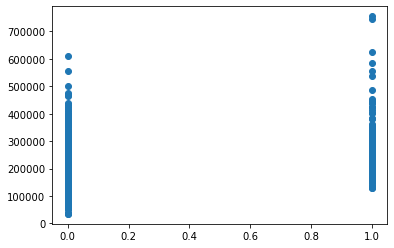

In [1129]:
plt.scatter(x_train.MSSubClass_60, y_train)

In [1283]:
model_xgb.fit(x_train,y_train)
pred_test = model_xgb.predict(x_test)

In [1131]:
result3=pd.DataFrame({'Id':x_test.index, 'SalePrice':pred_test}).set_index('Id', drop=True)

In [1132]:
result3

,SalePrice
Id,
1461,130404.757812
1462,156147.109375
1463,182827.421875
1464,186213.625000
1465,202170.296875
...,...
2915,85031.078125
2916,89177.671875
2917,160519.171875


In [1133]:
result3.to_csv('result3.csv')

In [597]:
rmse = lambda est, x, y: np.sqrt(mse(x.values.reshape(-1,1),y.values.reshape(-1,1)))

In [598]:
from sklearn.model_selection import GridSearchCV

In [599]:
grid=GridSearchCV(XGBRegressor(), {'learning_rate':[0.001,0.003,0.01,.03,0.1,0.3], 'n_estimators' : [500,1000,1500,2000, 2500, 3000, 3500]})

In [600]:
#grid.fit(x_train, y_train)

KeyboardInterrupt: 

In [ ]:
#grid.best_estimator_

In [ ]:
#grid.refit

In [ ]:
#grid.best_index_

In [601]:
#grid.best_params_, grid.best_score_

## lasso model

In [602]:
from sklearn.linear_model import Lasso

In [603]:
model_lasso_1 = Lasso(alpha=1, fit_intercept=True, normalize=False, max_iter=10000)

In [604]:
y_train2_log= y_train2.copy().apply(np.log)
y_cv_log = y_cv.copy().apply(np.log)

In [605]:
y_train2, y_train2_log

(Id
 1108    274725.0
 175     184000.0
 659      97500.0
 276     205000.0
 1231    190000.0
           ...   
 307     225000.0
 497     430000.0
 26      256300.0
 443     162900.0
 1254    294000.0
 Name: SalePrice, Length: 947, dtype: float64,
 Id
 1108    12.523526
 175     12.122691
 659     11.487608
 276     12.230765
 1231    12.154779
           ...    
 307     12.323856
 497     12.971540
 26      12.454104
 443     12.000892
 1254    12.591335
 Name: SalePrice, Length: 947, dtype: float64)

In [606]:
model_lasso_1.fit(x_train2, y_train2_log)

Lasso(alpha=1, max_iter=10000)

In [607]:
pred_train2 = model_lasso_1.predict(x_train2)
pred_cv = model_lasso_1.predict(x_cv)

In [608]:
pred_train2

array([12.25210426, 12.35333423, 11.80540681, 11.94313269, 12.51268268,
       11.88755699, 12.80073292, 12.22096396, 12.16864943, 12.45682708,
       12.28232485, 12.11170711, 11.71993159, 12.2221504 , 12.03045799,
       11.85980926, 12.08396694, 11.73569747, 11.86570518, 12.12785199,
       12.94683919, 11.72055184, 12.01097094, 11.70769943, 12.04231334,
       11.94520525, 12.11554175, 12.38182333, 11.86915929, 12.35726751,
       12.51358252, 11.81620019, 11.81910194, 12.118959  , 11.91863023,
       11.81434169, 12.13339807, 11.47331082, 11.85793604, 12.0857542 ,
       12.05767613, 11.64150183, 12.04478571, 12.25666155, 12.11601771,
       11.92053562, 12.21098533, 11.3490307 , 11.53760668, 11.8189696 ,
       11.99763894, 12.19496649, 11.56844203, 12.01377855, 11.934191  ,
       12.40108445, 12.05074786, 12.31041989, 12.14311267, 12.58498745,
       12.11487735, 11.71008288, 11.97421811, 11.63705957, 12.0201586 ,
       11.66960442, 12.38646996, 12.08800513, 11.94102983, 12.33

In [609]:
rmse_train2 = np.sqrt(mse(y_train2, np.exp(pred_train2)))
rmse_cv = np.sqrt(mse(y_cv, np.exp(pred_cv)))

rmse_train2, rmse_cv

(31307.258798676387, 31756.92013732233)

In [610]:
def train_lasso(x_train2, y_train2, x_cv, y_cv, y_log=False, alpha=1, fit_intercept=True, normalize=False, max_iter=10000):
    if not y_log:
        y_train2_log= y_train2.copy().apply(np.log)
        y_cv_log = y_cv.copy().apply(np.log)

        model_lasso_1 = Lasso(alpha, fit_intercept, normalize, max_iter=max_iter)
        model_lasso_1.fit(x_train2, y_train2_log)

        pred_train2 = model_lasso_1.predict(x_train2)
        pred_cv = model_lasso_1.predict(x_cv)

        rmse_train2 = np.sqrt(mse(y_train2, np.exp(pred_train2)))
        rmse_cv = np.sqrt(mse(y_cv, np.exp(pred_cv)))
        print(f'alpha={alpha}, fit_intercept={fit_intercept}, normalize={normalize}, max_iter={max_iter}. RMSE_train2,cv:{rmse_train2,rmse_cv}')
        return model_lasso_1
    else: 
        model_lasso_1 = Lasso(alpha, fit_intercept, normalize, max_iter=max_iter)
        model_lasso_1.fit(x_train2, y_train2)

        pred_train2 = model_lasso_1.predict(x_train2)
        pred_cv = model_lasso_1.predict(x_cv)

        rmse_train2 = np.sqrt(mse(y_train2, pred_train2))
        rmse_cv = np.sqrt(mse(y_cv, pred_cv))
        print(f'alpha={alpha}, fit_intercept={fit_intercept}, normalize={normalize}, max_iter={max_iter}. RMSE_train2,cv:{rmse_train2,rmse_cv}')
        return model_lasso_1
        

In [611]:
#train_lasso(x_train2, y_train2, x_cv, y_cv, y_log=False, normalize=False)

In [612]:
#train_lasso(x_train2, y_train2, x_cv, y_cv, y_log=True, normalize=False)

In [613]:
#train_lasso(x_train2, y_train2, x_cv, y_cv, y_log=False, normalize=True)

In [614]:
model_lasso = train_lasso(x_train2, y_train2, x_cv, y_cv, y_log=True, normalize=True)

alpha=1, fit_intercept=True, normalize=True, max_iter=10000. RMSE_train2,cv:(22903.66825075951, 27015.095052229408)


In [617]:
(model_lasso.coef_<1).sum()

101

In [619]:
model_lasso.n_features_in_

177

In [1146]:
feat.index

Index(['ExterQual', 'OverallQual', 'KitchenQual', 'GarageFinish', 'FullBath',
       'GarageArea', 'Bath', 'FireplaceQu', 'BsmtQual', 'GrLivArea',
       ...
       'Neighborhood_NWAmes', 'Exterior_nan', 'Exterior_Stucco',
       'Exterior_Shng', 'Exterior_Other', 'Neighborhood_nan',
       'Neighborhood_SawyerW', 'Neighborhood_Sawyer', 'Neighborhood_SWISU',
       'MSSubClass_190'],
      dtype='object', name='col', length=177)

### the important thing is to apply log(y)
#### look at each feature against y and log(y), then transform that feature respectively may help.

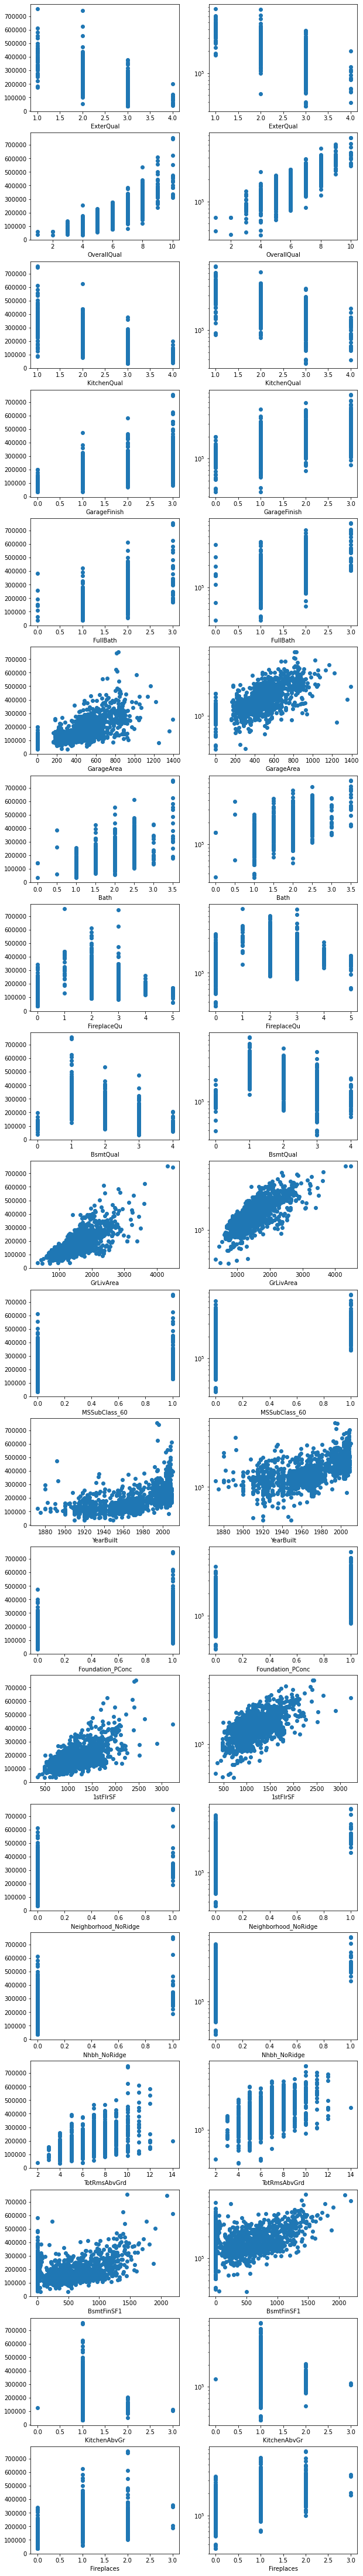

In [1150]:
fig,ax=plt.subplots(20,2,figsize=(10,80))

for i in range(20):
    ax[i][0].scatter(x_train[feat.index[i]], y_train)
    ax[i][0].set_xlabel(feat.index[i])
    
    ax[i][1].scatter(x_train[feat.index[i]], y_train)
    ax[i][1].set_xlabel(feat.index[i])
    ax[i][1].set_yscale('log')
    

plt.show()

### tune parameters

In [1171]:
from sklearn.metrics import make_scorer

mse_scorer = make_scorer(mse)

In [1215]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled

array([[0.32960894, 0.18414656, 0.44444444, ..., 0.        , 0.        ,
        0.        ],
       [0.33519553, 0.23212407, 0.55555556, ..., 0.        , 0.        ,
        0.        ],
       [0.29608939, 0.22419735, 0.44444444, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.77653631, 0.33611464, 0.44444444, ..., 0.        , 0.        ,
        0.        ],
       [0.22905028, 0.16272447, 0.44444444, ..., 0.        , 0.        ,
        0.        ],
       [0.29608939, 0.14795937, 0.66666667, ..., 0.        , 0.        ,
        0.        ]])

In [1213]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(Lasso(fit_intercept=True), param_grid={'alpha':[0.03,0.1,0.3,1,3,10,30]})

grid.fit(x_train_scaled, y_train.apply(np.log))

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.03, 0.1, 0.3, 1, 3, 10, 30]})

In [1214]:
grid.best_estimator_

Lasso(alpha=0.03)

In [1200]:
grid.refit

True

In [1201]:
grid.cv_results_

{'mean_fit_time': array([0.09127297, 0.08158998, 0.08846154, 0.08198829, 0.08047485]),
 'std_fit_time': array([0.01153318, 0.00397529, 0.00585649, 0.00524938, 0.00421765]),
 'mean_score_time': array([0.00463138, 0.00452347, 0.00434918, 0.00431681, 0.00420861]),
 'std_score_time': array([0.00065228, 0.00024833, 0.00028089, 0.00035092, 0.00011744]),
 'param_alpha': masked_array(data=[80, 85, 90, 95, 100],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 80},
  {'alpha': 85},
  {'alpha': 90},
  {'alpha': 95},
  {'alpha': 100}],
 'split0_test_score': array([0.87730524, 0.8772105 , 0.87713645, 0.87704806, 0.87694946]),
 'split1_test_score': array([0.91399231, 0.91422418, 0.91442961, 0.91461628, 0.91479672]),
 'split2_test_score': array([0.89206796, 0.89191728, 0.89173972, 0.89155164, 0.89136027]),
 'split3_test_score': array([0.8852337 , 0.88523178, 0.88516546, 0.88506554, 0.88494921]),
 'split4_test_score': ar

In [1203]:
model_lasso_3 = train_lasso(x_train2, y_train2, x_cv, y_cv, alpha=30, y_log=True, normalize=True)

alpha=30, fit_intercept=True, normalize=True, max_iter=10000. RMSE_train2,cv:(24572.013528263054, 26797.0923037787)


In [1204]:
model_lasso_1 = train_lasso(x_train2, y_train2, x_cv, y_cv, alpha=10, y_log=True, normalize=True)

alpha=10, fit_intercept=True, normalize=True, max_iter=10000. RMSE_train2,cv:(23328.56781071245, 26361.512328218738)


In [1205]:
model_lasso_2 = train_lasso(x_train2, y_train2, x_cv, y_cv, alpha=20, y_log=True, normalize=True)

alpha=20, fit_intercept=True, normalize=True, max_iter=10000. RMSE_train2,cv:(23997.581170860274, 26460.536517079167)


In [1218]:
model_lasso_15 = train_lasso(x_train2, y_train2, x_cv, y_cv, alpha=15, y_log=True, normalize=True)

alpha=15, fit_intercept=True, normalize=True, max_iter=10000. RMSE_train2,cv:(23679.353433757133, 26389.300066399453)


In [1227]:
x_test.isna().sum().sort_values()

LotFrontage          0
BsmtBath             0
Bath                 0
GarageType_2Types    0
GarageType_Attchd    0
                    ..
LandSlope_nan        0
LotConfig_Corner     0
MSSubClass_190       0
BsmtUnfSF            1
GarageArea           1
Length: 177, dtype: int64

In [1228]:
x_test[x_test.GarageArea.isna()]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
Id,,,,,,,,,,,,,,,,,,,,,
2577,50.0,9060,5,6,1923,1999,0.0,3,3,2,...,1,0,0,0,0,0,0,0,0,0


In [1229]:
x_test['GarageArea'].fillna(0, inplace=True)

In [1231]:
x_test['BsmtUnfSF'].fillna(0,inplace=True)

In [1232]:
pred_test=model_lasso_15.predict(x_test)

In [1233]:
result4=pd.DataFrame({'Id':x_test.index, 'SalePrice':pred_test}).set_index('Id', drop=True)
result4.to_csv('result4.csv')

In [1234]:
pred_train = model_lasso_15.predict(x_train)

Text(0.5, 1.0, 'Residue plot for model_lasso_15')

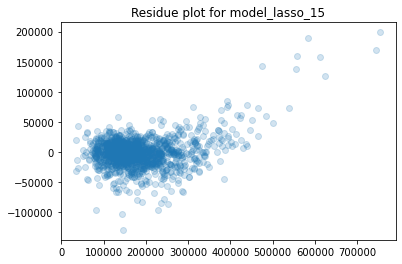

In [1292]:
plt.scatter(y_train, y_train-pred_train, alpha=0.2)
plt.title('Residue plot for model_lasso_15')

SyntaxError: invalid syntax (<ipython-input-1251-6a8dca3ec0d7>, line 1)

In [1260]:
col_to_square = [col for col in x_train.columns if '_' not in list(col)]

In [1270]:
square_feats=x_train[col_to_square]**2
square_feats.columns = list(map(lambda x:x+'_square',col_to_square))

In [1300]:
cubic_feats=x_train[col_to_square]**3
cubic_feats.columns = list(map(lambda x:x+'_cubic',col_to_square))

In [1271]:
square_feats

,LotFrontage_square,LotArea_square,OverallQual_square,OverallCond_square,YearBuilt_square,YearRemodAdd_square,MasVnrArea_square,ExterQual_square,ExterCond_square,BsmtQual_square,...,3SsnPorch_square,ScreenPorch_square,PoolArea_square,Fence_square,MiscVal_square,StreetAdj_square,RailroadAdj_square,Level_square,BsmtBath_square,Bath_square
Id,,,,,,,,,,,,,,,,,,,,,
1,4225.0,71402500,49,25,4012009,4012009,38416.0,4,9,4,...,0,0,0,0,0,0,0,4,1.00,6.25
2,6400.0,92160000,36,64,3904576,3904576,0.0,9,9,4,...,0,0,0,0,0,1,0,1,0.25,4.00
3,4624.0,126562500,49,25,4004001,4008004,26244.0,4,9,4,...,0,0,0,0,0,0,0,4,1.00,6.25
4,3600.0,91202500,49,25,3667225,3880900,0.0,9,9,9,...,0,0,0,0,0,0,0,4,1.00,1.00
5,7056.0,203347600,64,25,4000000,4000000,122500.0,4,9,4,...,0,0,0,0,0,0,0,4,1.00,6.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,3844.0,62678889,36,25,3996001,4000000,0.0,9,9,4,...,0,0,0,0,0,0,0,4,0.00,6.25
1457,7225.0,173580625,36,36,3912484,3952144,14161.0,9,9,4,...,0,0,0,1,0,0,0,1,1.00,4.00
1458,4356.0,81757764,49,81,3767481,4024036,0.0,1,4,9,...,0,0,0,4,6250000,0,0,4,0.00,4.00


In [1274]:
x_train= pd.concat([x_train,square_feats],axis=1)

In [1301]:
x_train_cubic = pd.concat([x_train,cubic_feats],axis=1)

In [1275]:
x_train

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,3SsnPorch_square,ScreenPorch_square,PoolArea_square,Fence_square,MiscVal_square,StreetAdj_square,RailroadAdj_square,Level_square,BsmtBath_square,Bath_square
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,2,3,2,...,0,0,0,0,0,0,0,4,1.00,6.25
2,80.0,9600,6,8,1976,1976,0.0,3,3,2,...,0,0,0,0,0,1,0,1,0.25,4.00
3,68.0,11250,7,5,2001,2002,162.0,2,3,2,...,0,0,0,0,0,0,0,4,1.00,6.25
4,60.0,9550,7,5,1915,1970,0.0,3,3,3,...,0,0,0,0,0,0,0,4,1.00,1.00
5,84.0,14260,8,5,2000,2000,350.0,2,3,2,...,0,0,0,0,0,0,0,4,1.00,6.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,62.0,7917,6,5,1999,2000,0.0,3,3,2,...,0,0,0,0,0,0,0,4,0.00,6.25
1457,85.0,13175,6,6,1978,1988,119.0,3,3,2,...,0,0,0,1,0,0,0,1,1.00,4.00
1458,66.0,9042,7,9,1941,2006,0.0,1,2,3,...,0,0,0,4,6250000,0,0,4,0.00,4.00


In [1276]:
square_feats_test=x_test[col_to_square]**2
square_feats_test.columns = list(map(lambda x:x+'_square',col_to_square))
x_test=pd.concat([x_test,square_feats_test], axis=1)

In [1302]:
cubic_feats_test=x_test[col_to_square]**3
cubic_feats_test.columns = list(map(lambda x:x+'_cubic',col_to_square))
x_test_cubic=pd.concat([x_test,cubic_feats_test], axis=1)

In [1277]:
x_test.shape

(1459, 221)

In [1279]:
x_train2, x_cv, y_train2, y_cv = train_test_split(x_train, y_train, test_size=0.35,random_state =150)

In [1280]:
model_lasso_quad = train_lasso(x_train2, y_train2, x_cv, y_cv, alpha=15, y_log=True, normalize=True)

alpha=15, fit_intercept=True, normalize=True, max_iter=10000. RMSE_train2,cv:(20260.519160619348, 23852.620319698235)


In [1288]:
model_lasso_quad.fit(x_train,y_train)

Lasso(alpha=15, max_iter=10000, normalize=True)

In [1289]:
pred_test_lasso=model_lasso_quad.predict(x_test)

In [1290]:
pred_train_lasso=model_lasso_quad.predict(x_train)

Text(0.5, 1.0, 'Residue plot for model_lasso_quad')

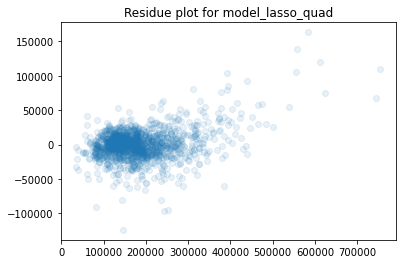

In [1299]:
plt.scatter(y_train, y_train-pred_train_lasso, alpha=0.1)
plt.title('Residue plot for model_lasso_quad')

In [1314]:
result4=pd.DataFrame({'Id':x_test.index, 'SalePrice':pred_test_lasso}).set_index('Id', drop=True)

In [1315]:
result4.to_csv('result4.csv')

In [1311]:
x_train2, x_cv, y_train2, y_cv = train_test_split(x_train_cubic, y_train, test_size=0.35,random_state =150)
model_lasso_cubic = train_lasso(x_train2, y_train2, x_cv, y_cv, alpha=20, y_log=True, normalize=True)
model_lasso_cubic.fit(x_train_cubic,y_train)

alpha=20, fit_intercept=True, normalize=True, max_iter=10000. RMSE_train2,cv:(19513.796425560326, 23105.506623398607)


Lasso(alpha=20, max_iter=10000, normalize=True)

In [1312]:
pred_test_lasso=model_lasso_cubic.predict(x_test_cubic)
pred_train_lasso=model_lasso_cubic.predict(x_train_cubic)

Text(0.5, 1.0, 'Residue plot for model_lasso_quad')

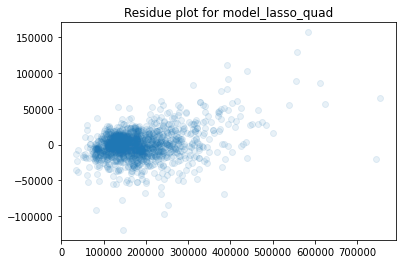

In [1313]:
plt.scatter(y_train, y_train-pred_train_lasso, alpha=0.1)
plt.title('Residue plot for model_lasso_quad')

### combine two models

In [1316]:
result5=pd.DataFrame({'Id':x_test.index, 'SalePrice':pred_test_lasso*0.25+pred_test*0.75}).set_index('Id', drop=True)
result5.to_csv('result5.csv')

Text(0.5, 1.0, 'Residue plot for model_xgb')

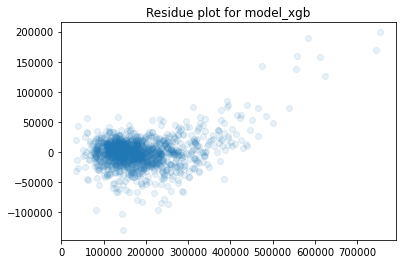

In [1298]:
plt.scatter(y_train, y_train-pred_train, alpha=0.1)
plt.title('Residue plot for model_xgb')

### To-do: 
- try transform skew features
- try Elastic-Net
- try to a correction for more expensive house
